In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

%config InlineBackend.figure_formats = 'retina'

In [2]:
img = plt.imread('./icepops.png')
print(img)

[[[0.9372549  0.9411765  0.93333334]
  [0.9372549  0.9411765  0.93333334]
  [0.9372549  0.9411765  0.93333334]
  ...
  [0.01176471 0.04705882 0.07843138]
  [0.02352941 0.04705882 0.07843138]
  [0.07450981 0.05098039 0.07058824]]

 [[0.92941177 0.9372549  0.92941177]
  [0.9372549  0.9411765  0.92941177]
  [0.9372549  0.9411765  0.93333334]
  ...
  [0.01176471 0.04313726 0.08235294]
  [0.08235294 0.05098039 0.07058824]
  [0.14117648 0.06666667 0.05490196]]

 [[0.93333334 0.9411765  0.9372549 ]
  [0.93333334 0.9411765  0.9372549 ]
  [0.92941177 0.9372549  0.93333334]
  ...
  [0.07058824 0.05098039 0.07058824]
  [0.14901961 0.06666667 0.05490196]
  [0.1882353  0.08627451 0.03137255]]

 ...

 [[0.89411765 0.9019608  0.8980392 ]
  [0.89411765 0.9019608  0.8980392 ]
  [0.8901961  0.8980392  0.89411765]
  ...
  [0.84705883 0.84705883 0.84705883]
  [0.85882354 0.8627451  0.8627451 ]
  [0.83137256 0.8352941  0.8352941 ]]

 [[0.8980392  0.90588236 0.9019608 ]
  [0.8980392  0.90588236 0.9019608 ]


In [3]:
def convert_to_greyscale(image):
    mean_values = np.zeros((image.shape[0], image.shape[1]))
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            mean_values[row, column] = image[row, column].mean()


    return mean_values

In [4]:
def vectorized_greyscale(img):
    return np.dot(img, [1/3, 1/3, 1/3])
grey = vectorized_greyscale(img)

In [5]:
greyscale = convert_to_greyscale(img)
print(greyscale)

[[0.93725491 0.93725491 0.93725491 ... 0.04575163 0.0496732  0.06535948]
 [0.93202615 0.93594772 0.93725491 ... 0.04575163 0.06797386 0.0875817 ]
 [0.93725491 0.93725491 0.93333334 ... 0.06405229 0.09019608 0.10196079]
 ...
 [0.89803916 0.89803916 0.89411765 ... 0.84705883 0.86143786 0.83398694]
 [0.90196079 0.90196079 0.89019608 ... 0.85490197 0.84444445 0.85098046]
 [0.89803916 0.89411765 0.88627452 ... 0.85882354 0.84183007 0.86143798]]


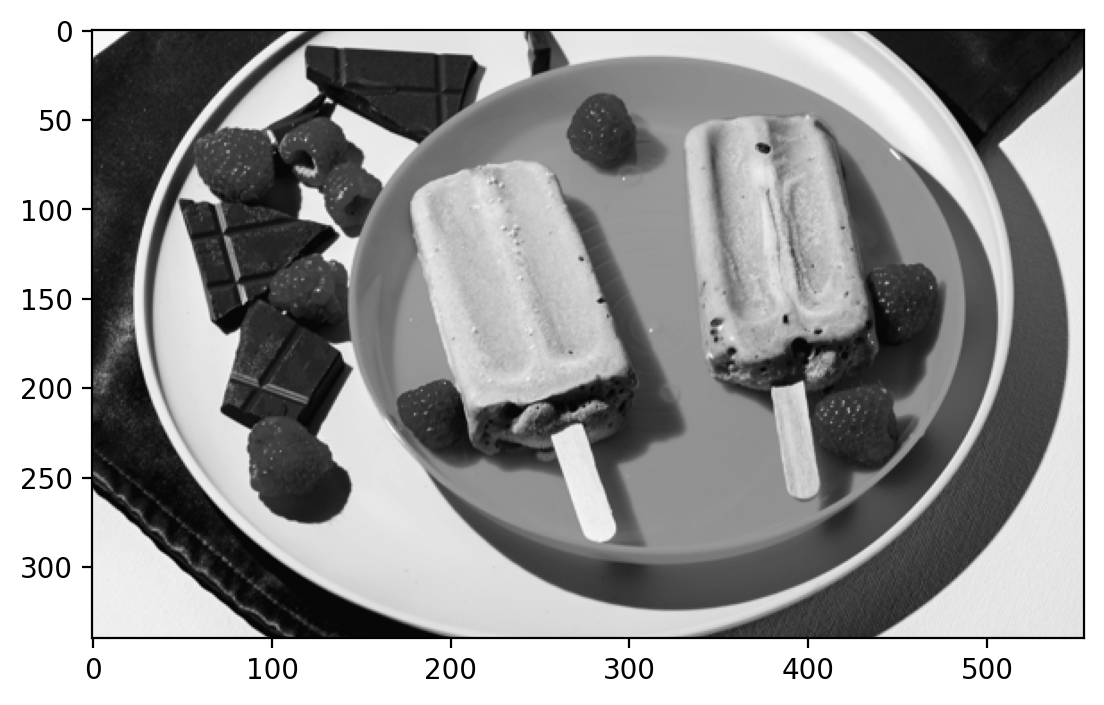

In [6]:
plt.imshow(greyscale, cmap='gray')

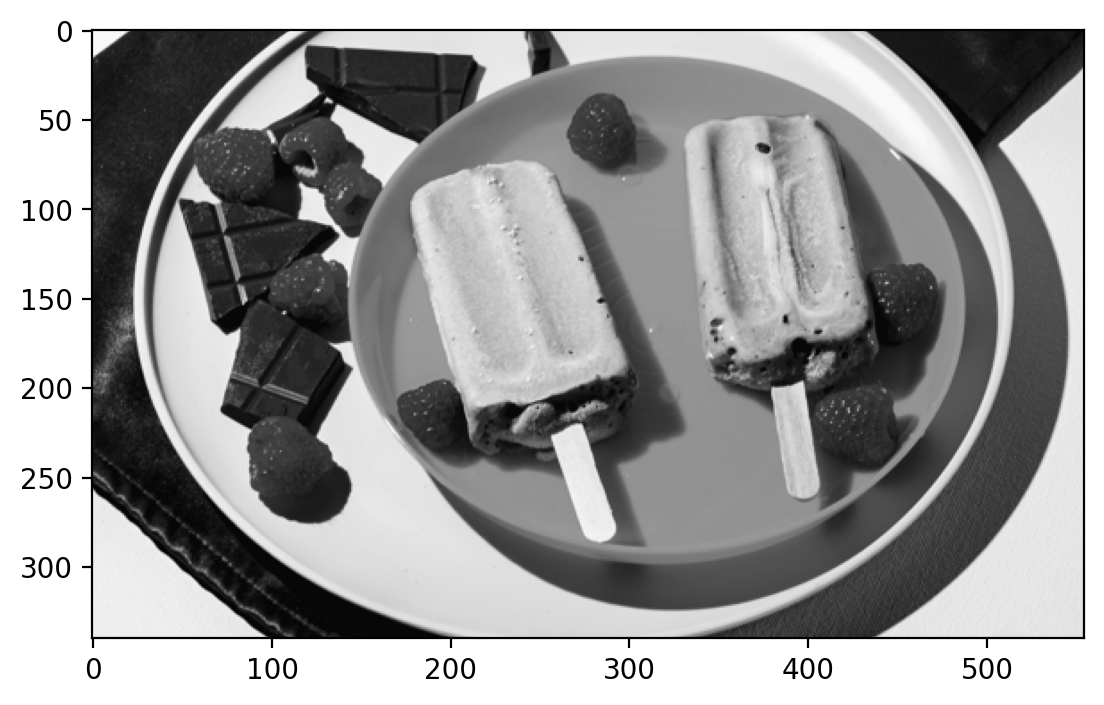

In [7]:
plt.imshow(grey, cmap='gray')

In [8]:
def weighted_greyscale(img, red=0.299, green=0.587, blue=0.114):
    return np.dot(img, [red, green, blue])

In [9]:
weighted = weighted_greyscale(img)

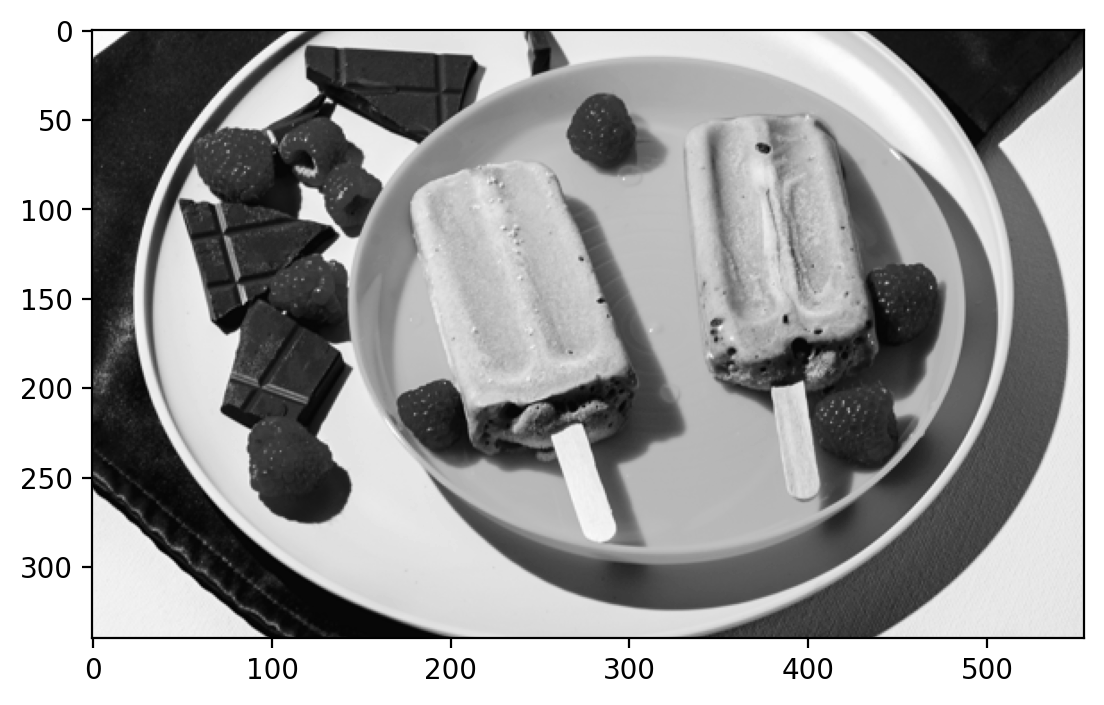

In [10]:
plt.imshow(weighted, cmap='gray')

In [11]:
def convert_to_black_white(img, threshold=0.5):
    return (img > threshold).astype(int)

In [12]:
bw = convert_to_black_white(weighted, 0.5)
bw

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

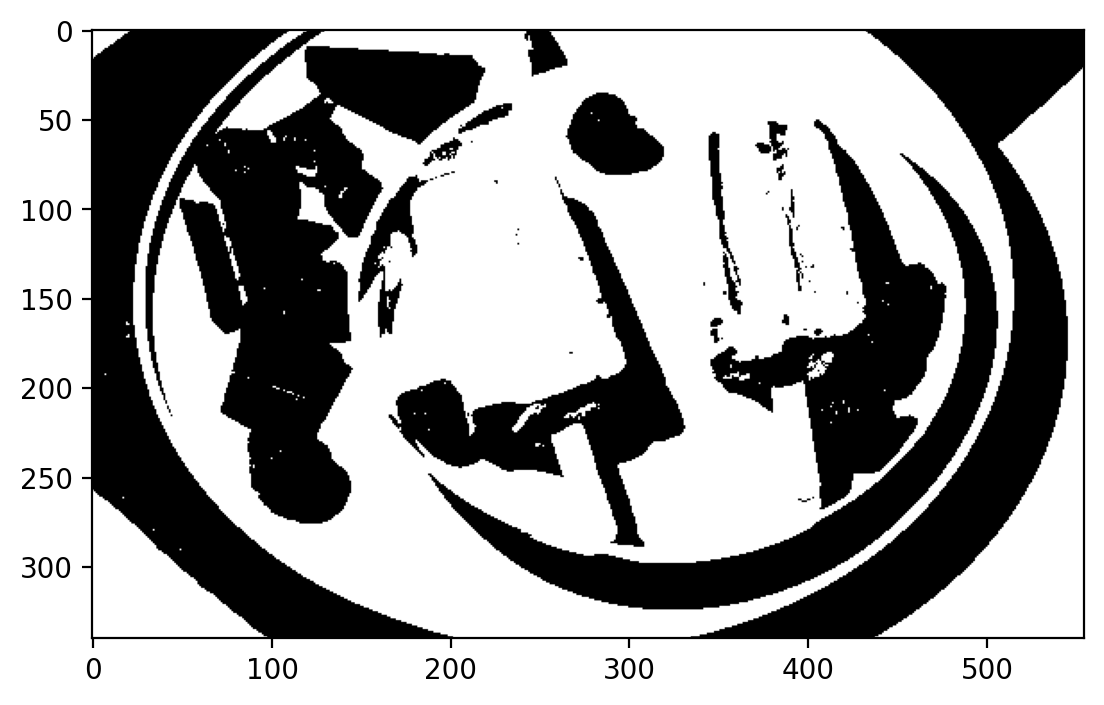

In [13]:
plt.imshow(bw, cmap='gray')

## Adaptive Thresholding

In [14]:
sudoko = plt.imread('./sudoku.jpg')

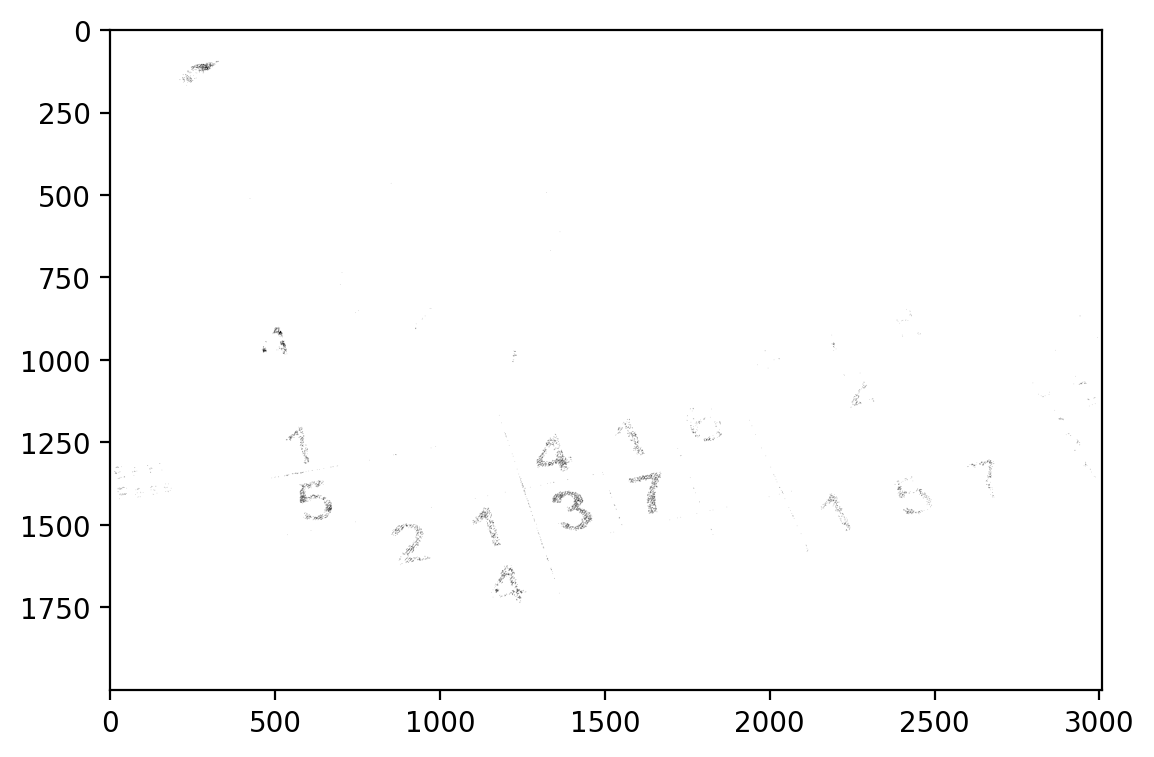

In [15]:
greyscaled = weighted_greyscale(sudoko)
bw = convert_to_black_white(greyscaled)
plt.imshow(bw, cmap='gray')

In [16]:
image = cv.imread('./sudoku.jpg', 0)

In [17]:
image = cv.medianBlur(image, 17)

In [18]:
threshold = 215
rt, th1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)

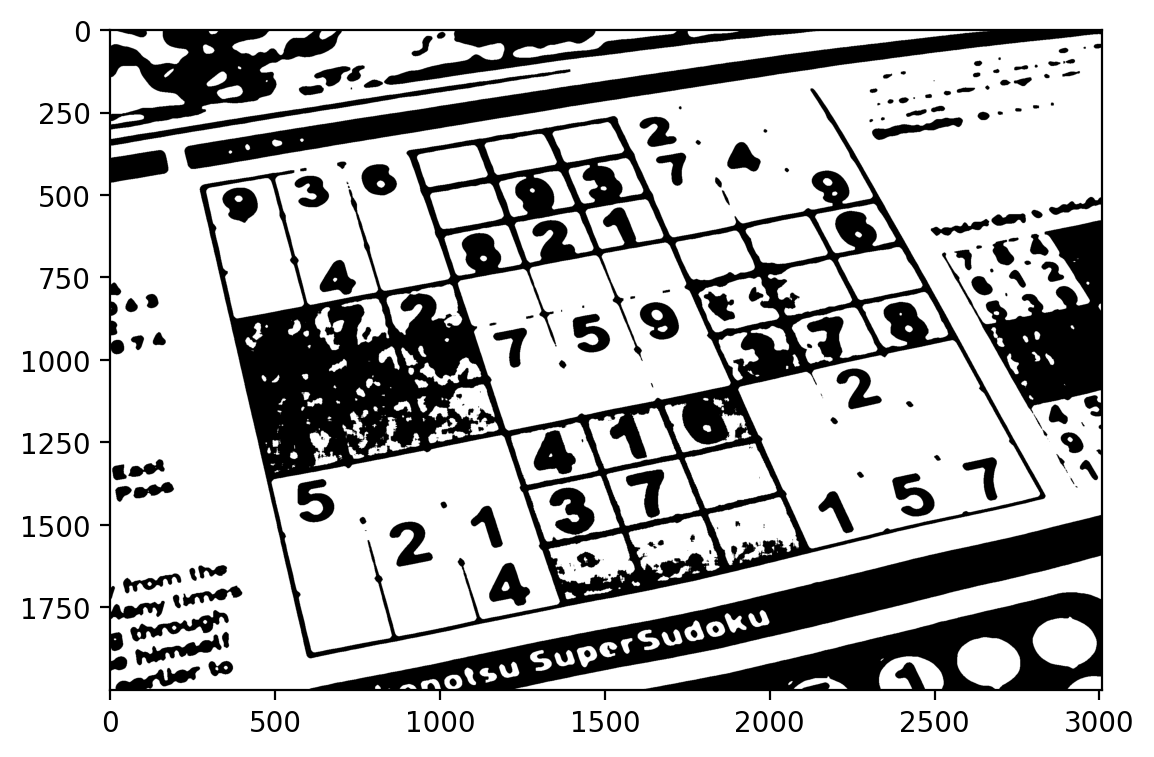

In [19]:
plt.imshow(th1, cmap='gray')

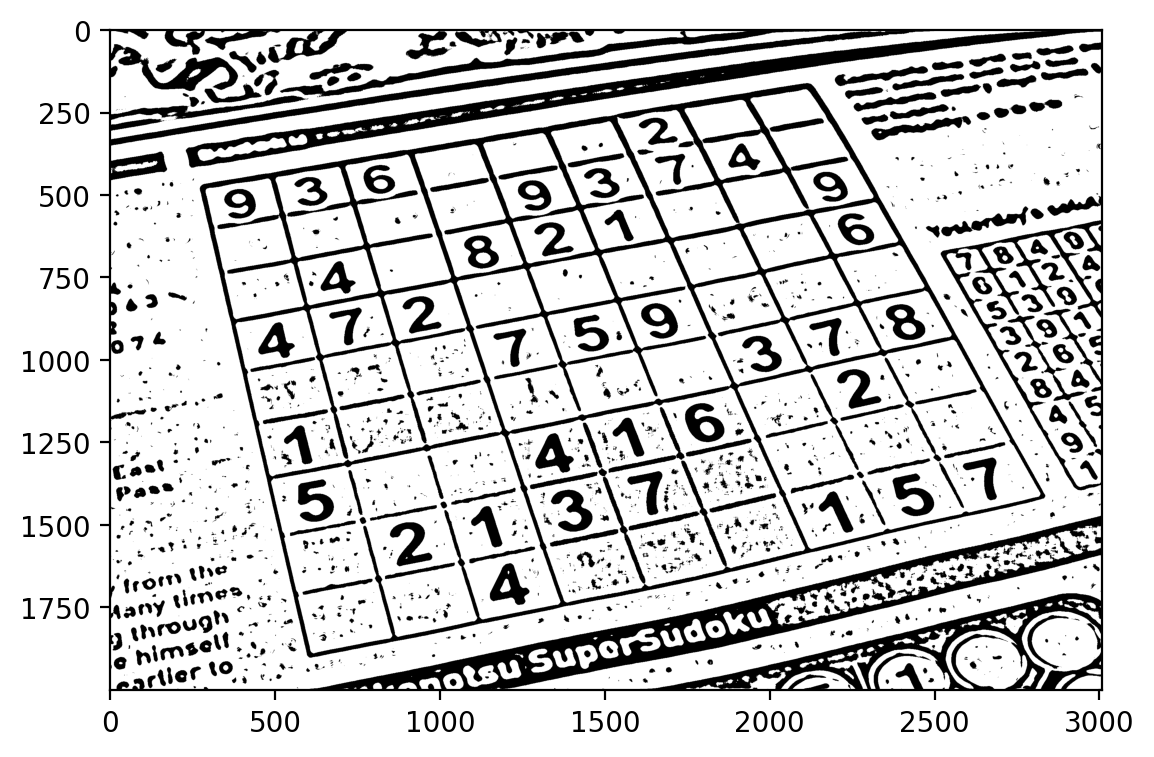

In [20]:
th2 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 33, 2)
plt.imshow(th2, cmap='gray')

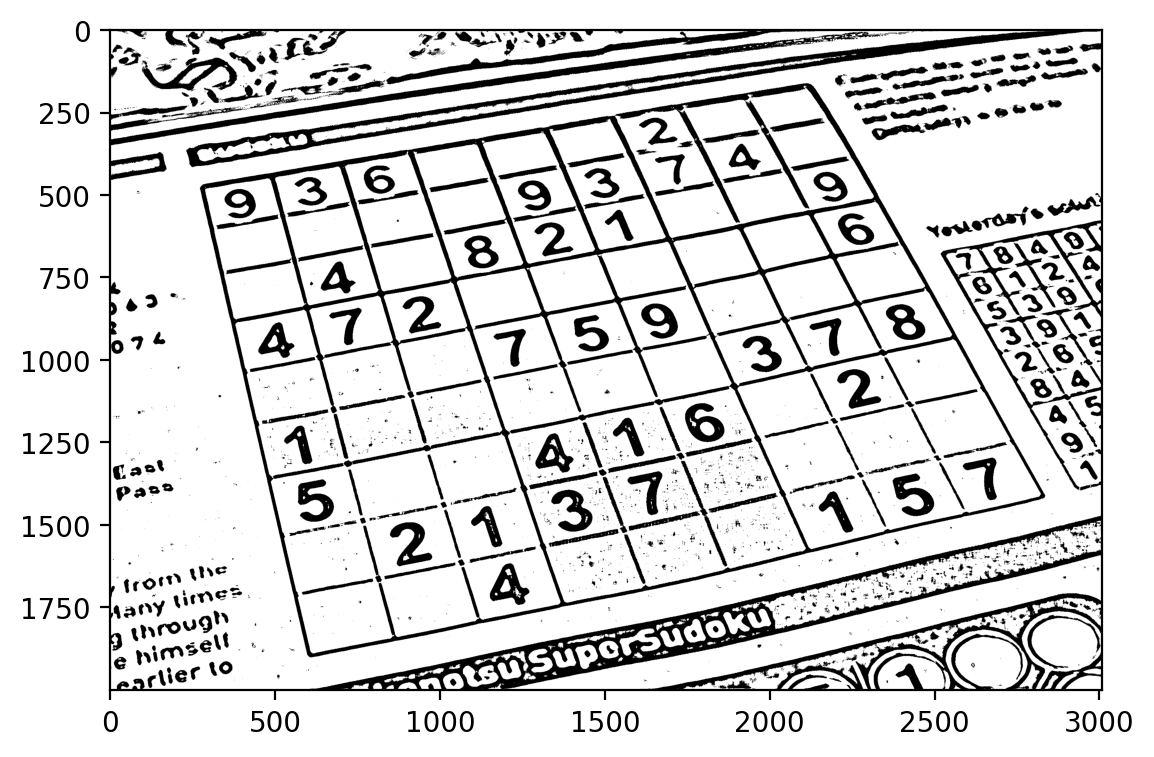

In [21]:
th3 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 33, 2)
plt.imshow(th3, cmap='gray')